# A continuación revisaremos los requerimientos y acciones que te han sido solicitados:
  # 1. Importar librerías y .csv. (2 punto) para ello:
        ● Importe las librerías básicas para el análisis de datos
        ● Descargue e importe el archivo nations.csv.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
plt.rcParams["figure.figsize"] = (4,4) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 200 # resolución gráficos
plt.rcParams['font.size'] = '6'

In [24]:
df=pd.read_csv('nations.csv', index_col=0, encoding='iso-8859-1')

In [25]:
variables_apellido = ['country', 'region', 'gdp', 'life', 'pop', 'urban', 'chldmort', 'adfert', 'co2',
       'gini']

In [26]:
df_2 = df.loc[:,variables_apellido]

# 2. Refactorizar gráficos matplotlib a seaborn (3 puntos). 
A partir de una serie de gráficos construidos con matplotlib, se solicita refactorizarlos utilizando seaborn. Además, se presenta la función que se utilizó para construirlos. Intente llegar al resultado con mayor similitud. Comente los principales resultados de los gráficos.

In [4]:
def binarize_histogram_plt(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    plt.subplot(1, 2, 1)
    plt.hist(hist_0, color='lightgrey')
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(tmp[variable]), 3)))
    plt.subplot(1, 2, 2)
    plt.hist(hist_1,color='lightgrey')
    plt.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(tmp[variable]), 3)))

In [5]:
def binarize_histogram_sns(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    plt.subplot(1, 2, 1)
    sns.histplot(data= hist_0, color='lightgrey')
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(tmp[variable]), 3)))
    plt.subplot(1, 2, 2)
    sns.histplot(data= hist_1,color='lightgrey')
    plt.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(tmp[variable]), 3)))

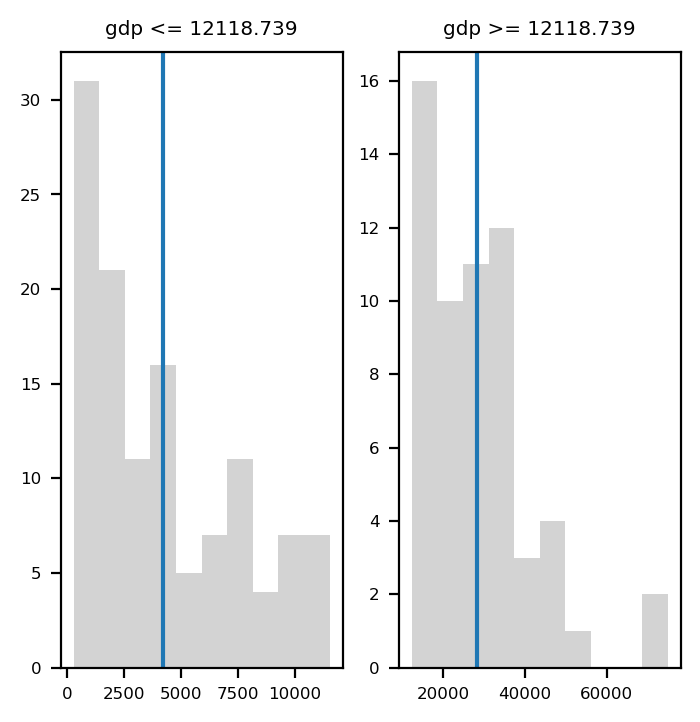

In [42]:
binarize_histogram_plt(df,'gdp')

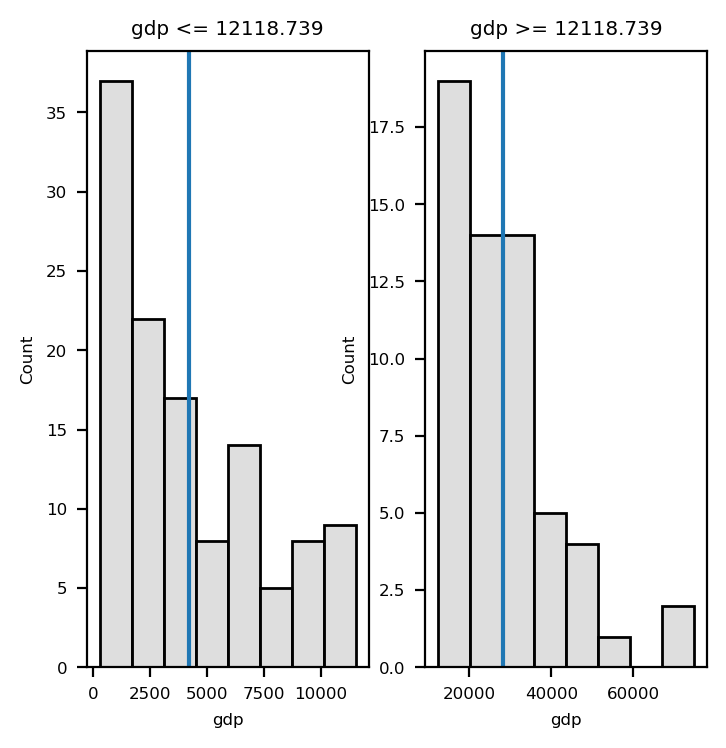

In [41]:
binarize_histogram_sns(df,'gdp')

In [8]:
def grouped_boxplot_plt(dataframe, variable, group_by): 
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by): 
        ax[i].boxplot(tmp[tmp[group_by] == n][variable])
        ax[i].set_title(n)

In [9]:
def grouped_boxplot_sns(dataframe, variable, group_by): 
    tmp = dataframe
    sns.boxplot(x='region', y='adfert', data=tmp)

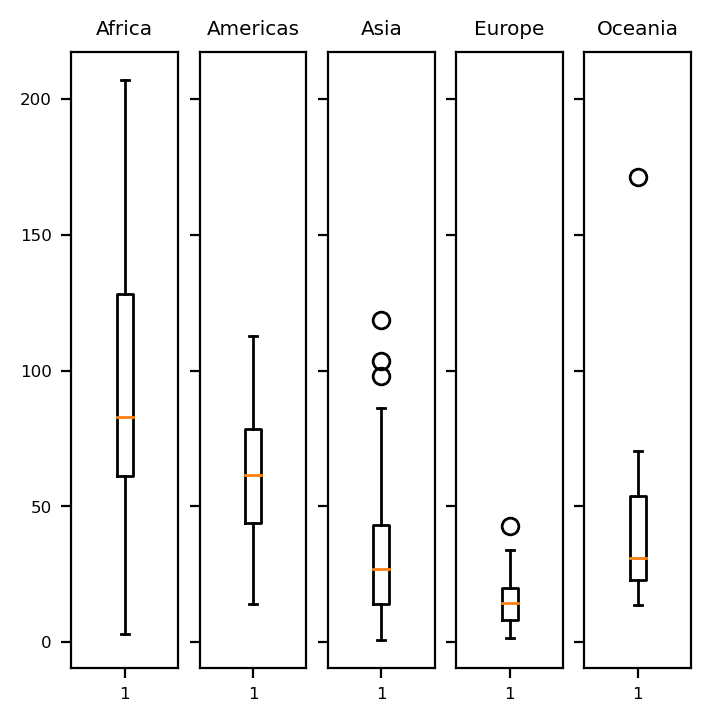

In [39]:
grouped_boxplot_plt(df, 'adfert', 'region')

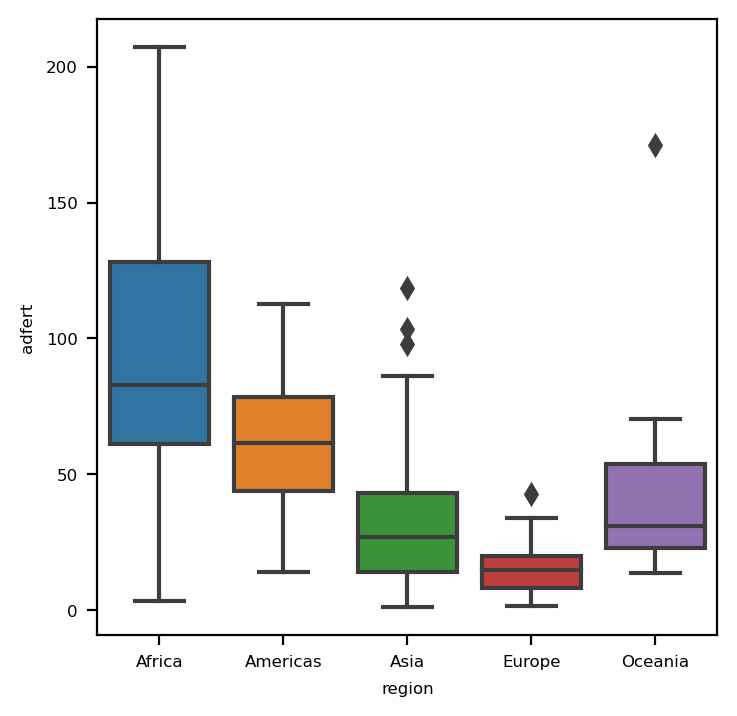

In [38]:
grouped_boxplot_sns(df, 'adfert', 'region')

In [12]:
def grouped_scatterplot_plt(dataframe, x, y, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)

    for i, n in enumerate(stratify_by):
        tmp_group_plt = tmp[tmp[group_by] == n] 
        ax[i].plot(tmp_group_plt[x], tmp_group_plt[y], 'o') 
        ax[i].set_title(n)

In [13]:
def grouped_scatterplot_sns(dataframe, x, y, group_by):
    tmp = dataframe
    grid=sns.FacetGrid(tmp, col=group_by, col_wrap=2)
    grid=grid.map(plt.scatter, x,y)

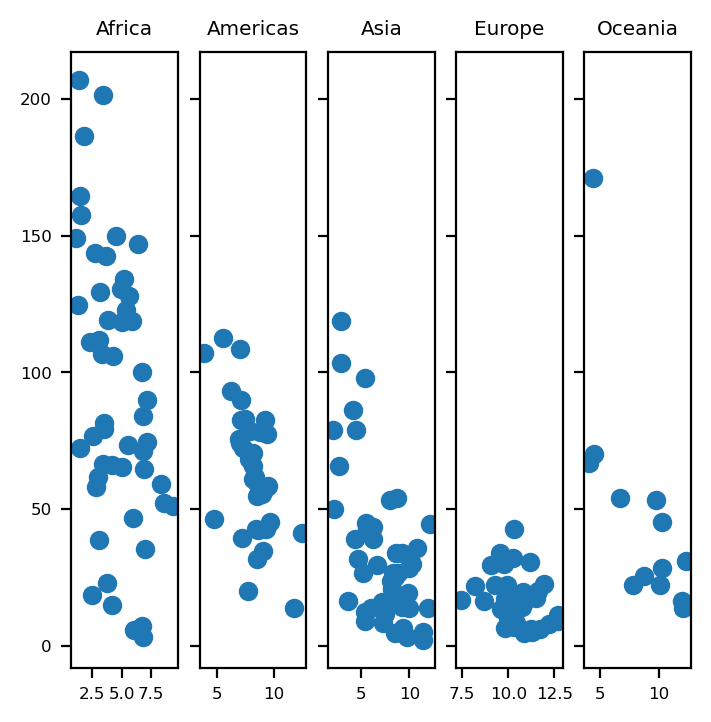

In [37]:
grouped_scatterplot_plt(df, 'school', 'adfert', 'region')

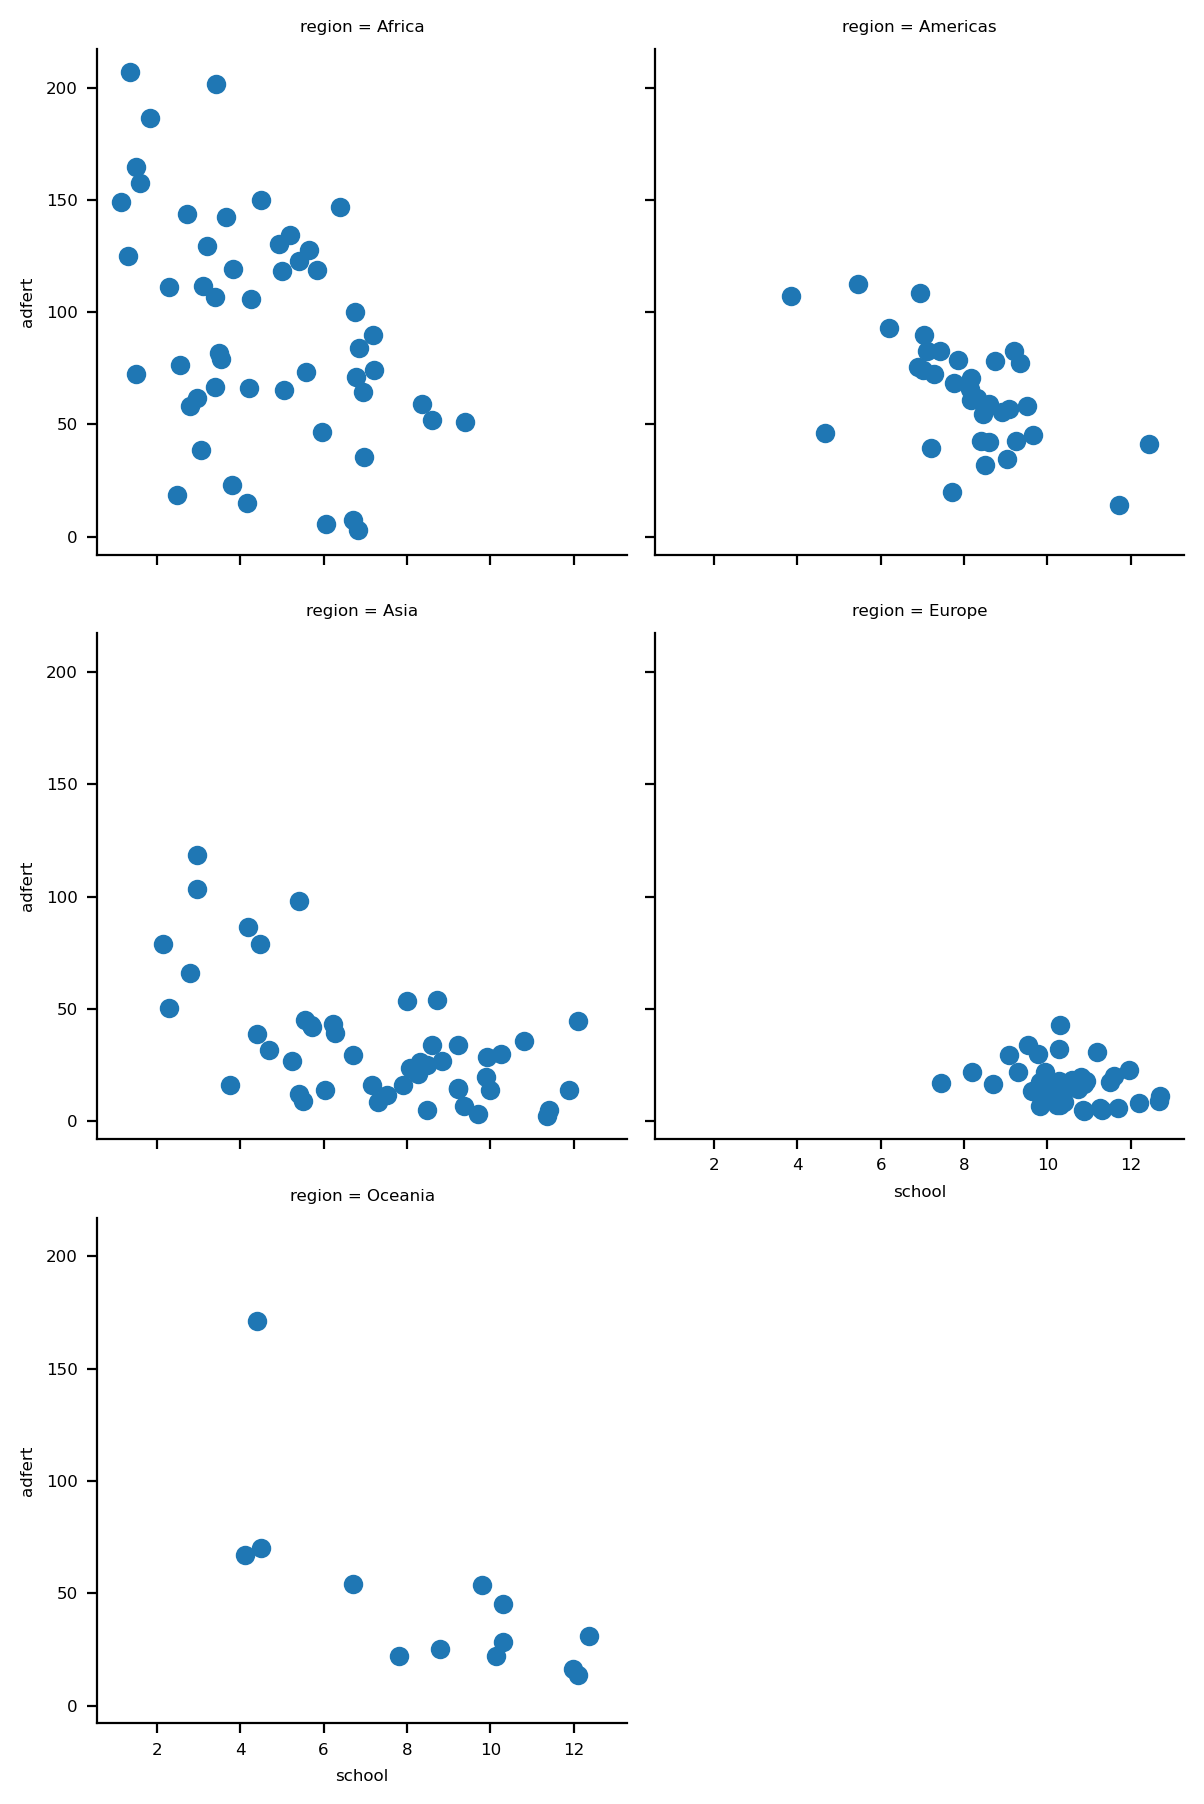

In [36]:
grouped_scatterplot_sns(df, 'school', 'adfert', 'region')

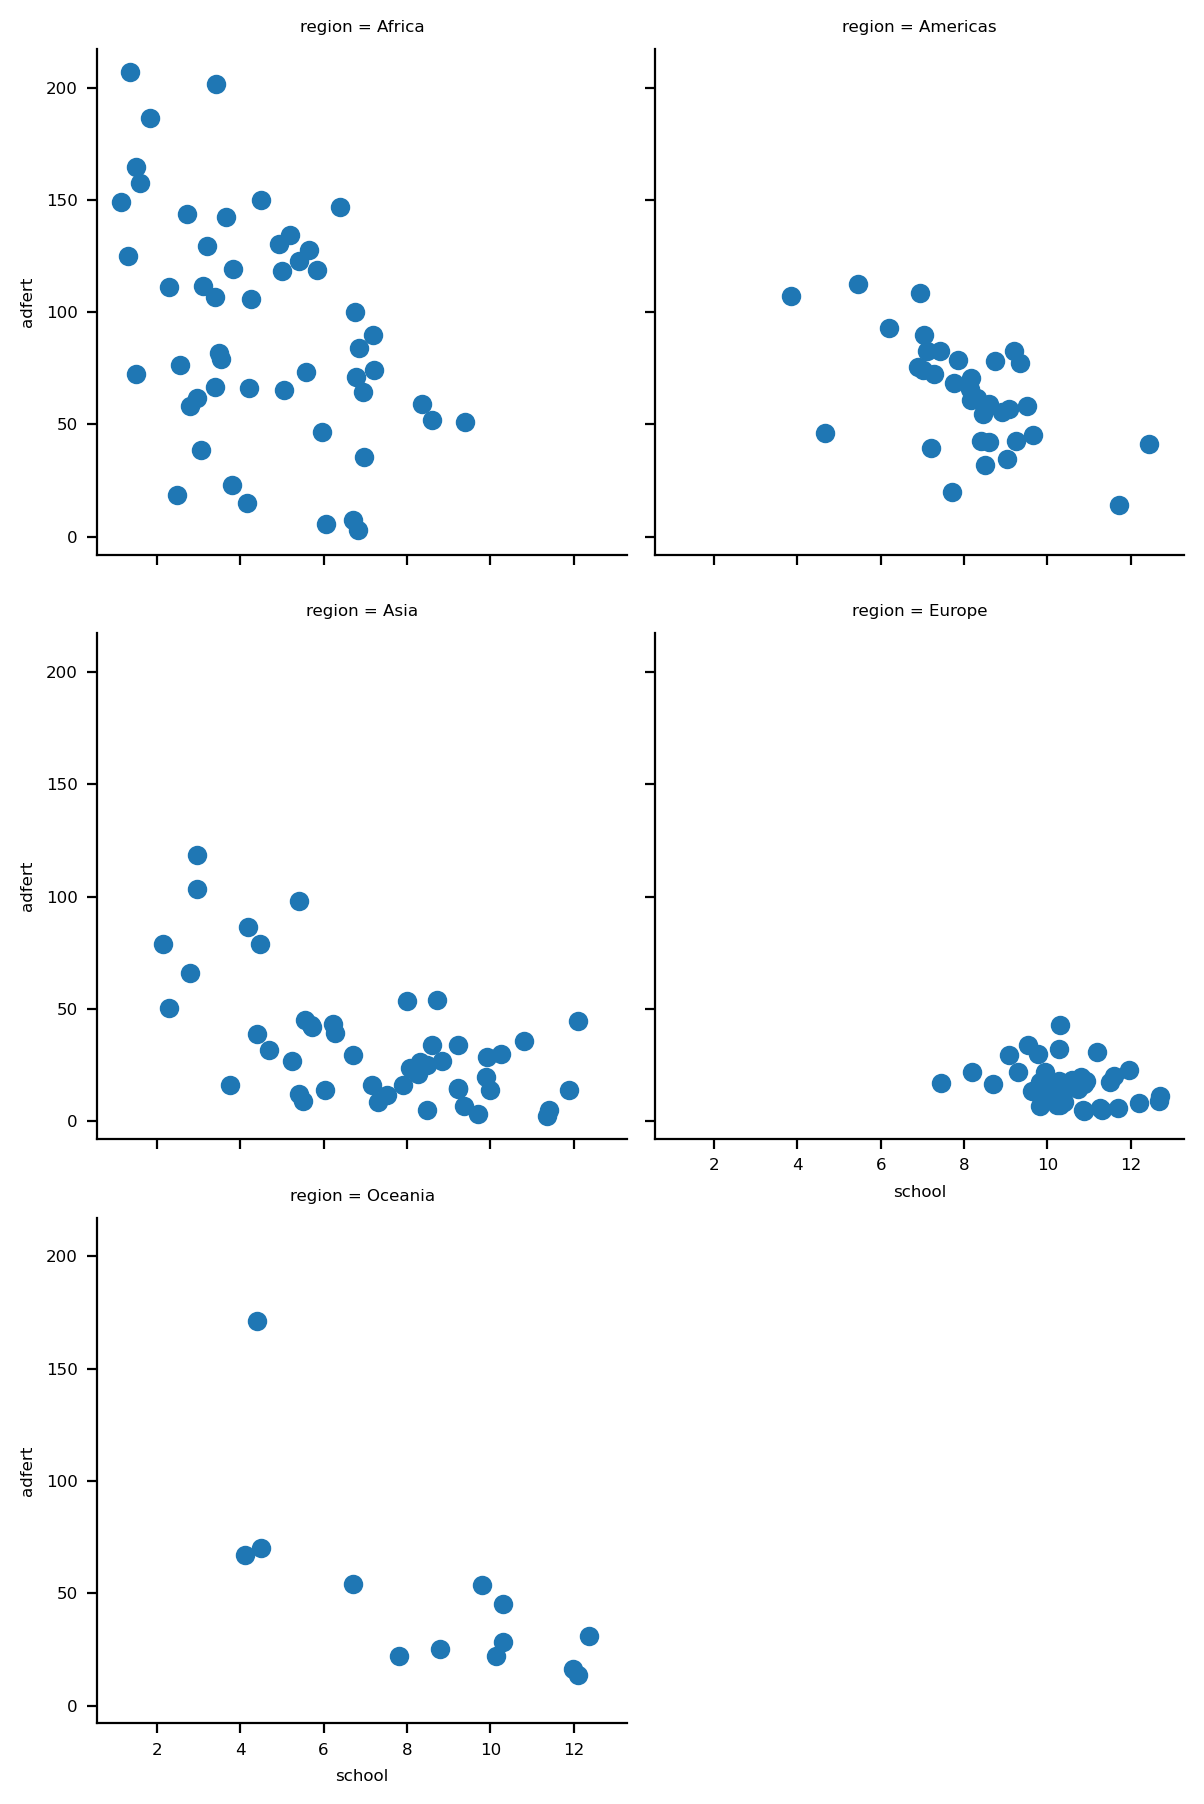

In [35]:
grid=sns.FacetGrid(df, col='region', col_wrap=2)
grid=grid.map(plt.scatter, 'school','adfert')

# 3. Generar un heatmap entre todas las variables (2 puntos): 
    Con base en las variables de interés asignadas, comente cuáles son las principales correlaciones existentes, 
    tomando como criterio de corte aquellas superior a .6

<AxesSubplot:>

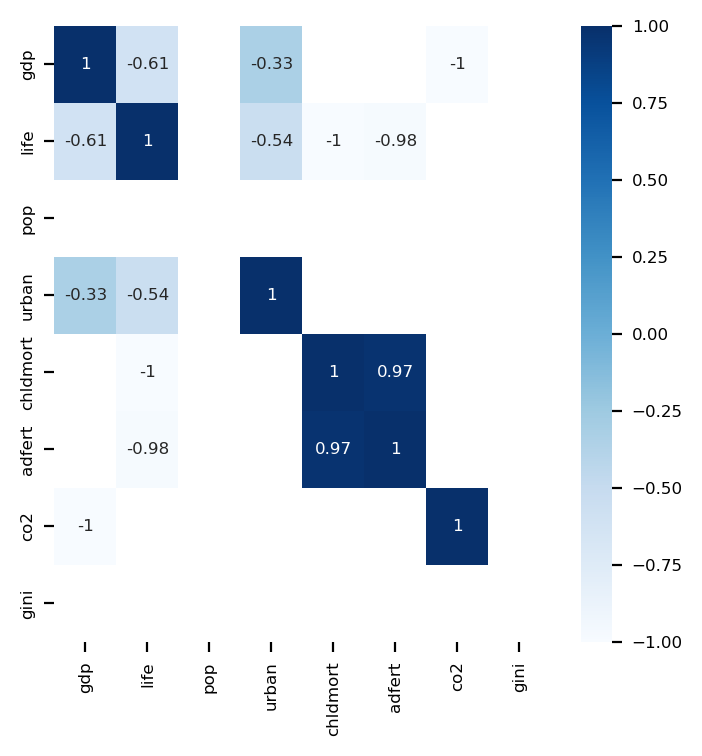

In [34]:
#creamos el subset
df_2 = df.loc[:, variables_apellido]
#creamos la matriz de correlaciones
df_correlaciones = df_2.corr()
df_correlaciones = df_correlaciones[(df_correlaciones > 0.6) | (df_correlaciones < -0.6)] #tip de Wilson

sns.heatmap(df_correlaciones.corr(), cmap='Blues',annot=True)      

Las principales relaciones son: chldmoort con adfert. Inversamente son: adfert y life y gdp y life.

# 4. A partir de las principales correlaciones, separarlas en un nuevo objeto y calcular la matriz de correlaciones para todas las regiones (3 puntos):
● Comente brevemente las principales correlaciones a través de las regiones.

In [68]:
def corr_heat(i, df_principales_correlaciones):
    plt.figure()
    sns.heatmap(df_principales_correlaciones[df_principales_correlaciones['region'] == i].corr(), cmap = "Blues", annot=True) 
    plt.title(i)

In [69]:
principales_correlaciones = ['region', 'gdp', 'adfert', 'chldmort', 'life']

In [70]:
df_principales_correlaciones = df.loc[:, principales_correlaciones]

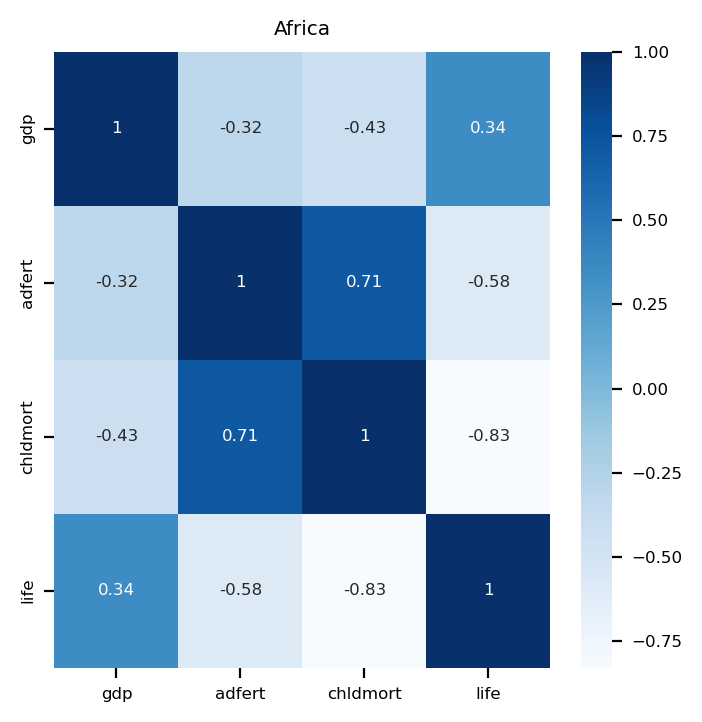

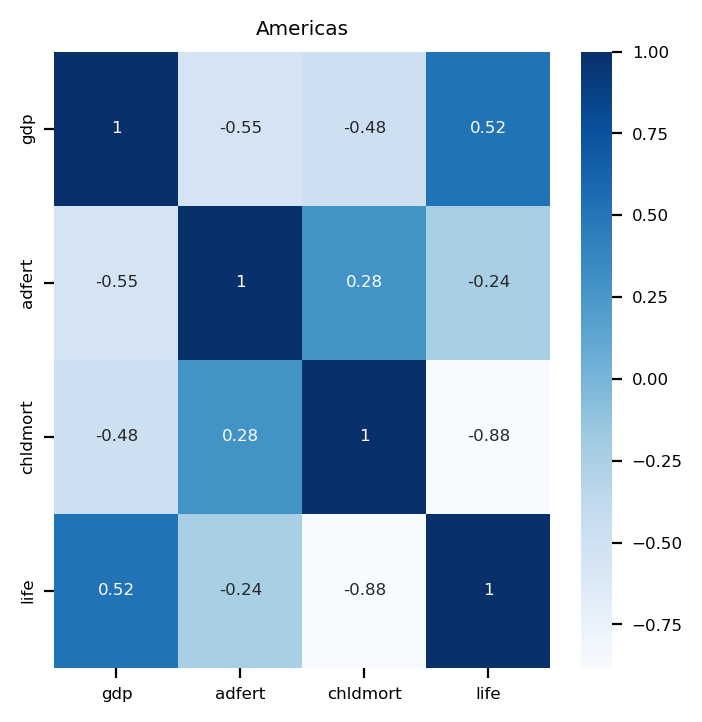

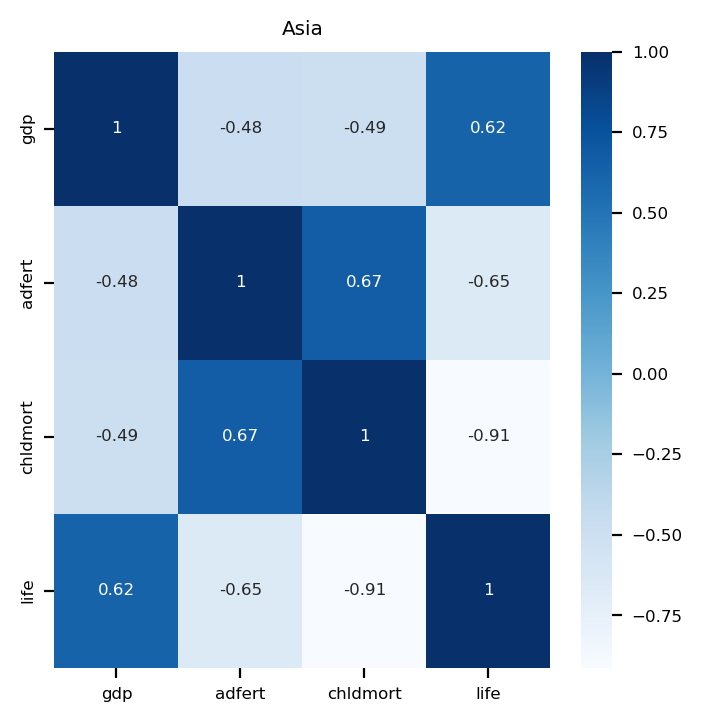

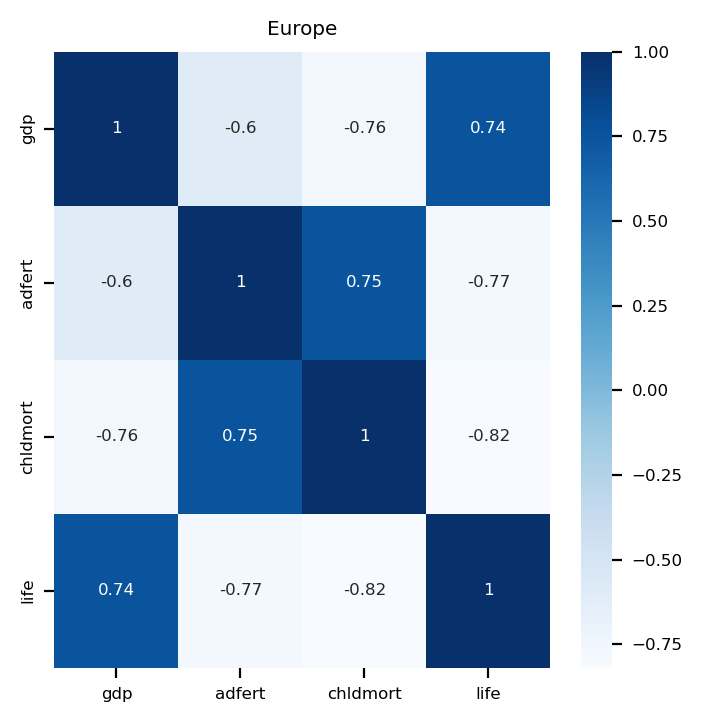

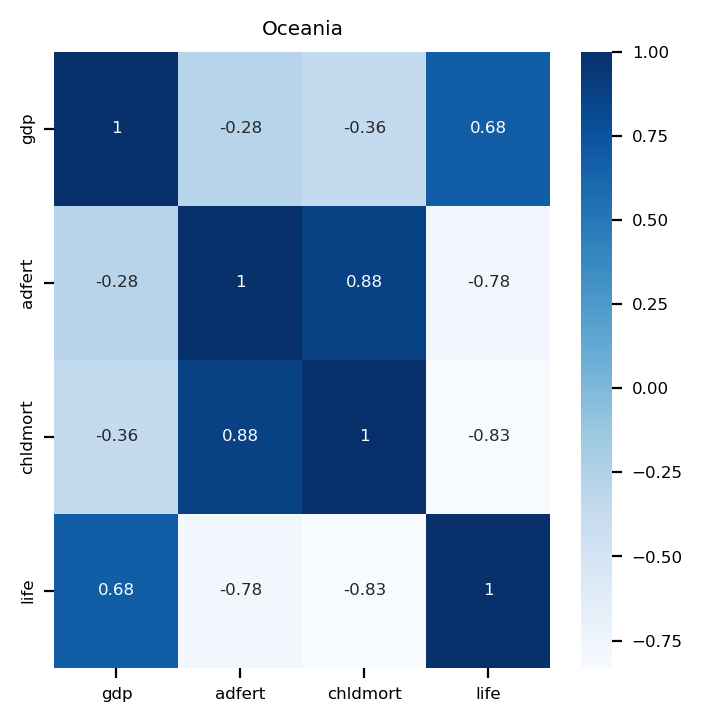

In [72]:
for i in df_principales_correlaciones['region'].unique(): 
    corr_heat(i,df_principales_correlaciones)

Principales correlaciones de acuerdo al requerimiento del .6 corte:
    - Africa: adfert y chldmort
    - Americas: ninguna
    - Asia: life y gdp, adfert y chldmort
    - Europe: gdp y life, adfert y chldmort
    - Oceania: life y gdp, adfert y chldmort